In [1]:
# SPOTIPY_CLIENT_ID='bb8646b35bb74a0c86e2d3595c14f366'
# SPOTIPY_CLIENT_SECRET='5aaa7cf3347e4bdd87e9d1ba3e719cda'
# SPOTIPY_REDIRECT_URI='http://localhost:8080'

import json
import pandas as pd
import spotipy
import seaborn as sns
import math
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# Setup Spotify API to grant access to user, we set the scope so we can access user-level information

username = 'jlou711'
scope = 'user-library-read playlist-modify playlist-modify-private playlist-read-private user-library-modify'

CLIENT_ID = 'bb8646b35bb74a0c86e2d3595c14f366'
CLIENT_SECRET = '86581a469b704b7c9aed9404997c7bc7'

playlist_id = '6SnzMCOtGl2697vzo6ynGi'

oauth = spotipy.oauth2.SpotifyOAuth(username = username,
                                   scope = scope,
                                   client_id=CLIENT_ID,
                                   client_secret=CLIENT_SECRET,
                                   redirect_uri='http://localhost:8080/')

sp = spotipy.Spotify(oauth_manager=oauth)

In [3]:
# Return a dictionary of the current playlists, this will be used to extract the names of our playlists with their
# URI's
dictCurrentPlaylists = sp.current_user_playlists()
playlists = {}
for i in range(len(dictCurrentPlaylists.get('items'))):
    playlists[(dictCurrentPlaylists.get('items')[i].get('name'))] = (dictCurrentPlaylists.get('items')[i].get('id'))
print(playlists)

{'ML_DRB': '5jBarqT34NO0sJTDRXFA64', 'ML_GYM': '4u2ZnEsDXrIZJ7vxggzPoR', 'japanese rock': '2ASu4V02EVrUrGK11lg4gq', 'discofever/jazzhands': '7hQJh4RliT5LglKP8smgvz', '✊🏾Bobat✊🏾': '6u3aRHUv0PxnUfcE2yEhfT', 'bouldering beats': '5sBRPlKVMRTTz7o29YsLdv', 'GYMKOONT- Zac Perna': '0XaPms1yQeOROd6EGngPYX', 'sundae pancake': '0eohfeAALAeZ57WDz9dQDc', 'Surf | Punk | Garage | Rock': '3sjKLU5aLYqDIv7NqzHvia', 'Butter': '37i9dQZF1DWVzZlRWgqAGH', 'in da sun//roadtrip': '4Ia408WEklUDDL23fMQirI', 'Curtain - Fri-Sat': '1OQ5cCD35VbaYgIhOxleLz', 'you&i': '2ZJ6RN6y7YH6FjiOzudeJr', '2am': '6p9gEuAoyCr8HAh4026XoQ', 'real good shit': '5ryjXuoKfWH7WkXM3HAcFL', 'UK Rap, Grime & Drill': '4wKzmG8IYO1xlZhRc6MEsv', 'lofi hip hop beats - music to study/relax to | Focus Music | Chillhop Music 2021': '74sUjcvpGfdOvCHvgzNEDO', 'chillbeats': '7lkXAaibvSsKoJ9IHpPUrZ', 'doperemixesandbeats': '6SnzMCOtGl2697vzo6ynGi', 'throwitback': '122X4NMtIv5yQD4bhvT23F', 'Muy caliente musica': '5HEirNudBMjodNlmzeAJx5', 'XYXX': '5Rs0Qs

In [5]:
# Lets try do some visualisations for our playlists! First we need to select a playlist and gets some tracks
# Since each request only returns a maximum of 100 items, we need to loop using the offset to get all the tracks
# For some reason, some playlists song count do not marry up to whats in Spotify?

get_playlists = ['doperemixesandbeats','Gym']

all_tracks = {}

for pl in get_playlists:
    all_tracks[pl] = []
    offset = 0
    trackCount = 1
    while(offset % 100 == 0 and trackCount != 0):
        tracks = sp.playlist_items(playlists[pl], offset = offset, additional_types=('track',))
        all_tracks[pl] += tracks['items']
        offset += len(tracks.get('items'))
        trackCount = len(tracks.get('items'))

In [9]:
# Lets create a data frame with some of the information from our playlist, we can create a dataframe
# via a dictionary, lets create our dictionary then!
# Lets store the trackID, artist, trackName, popularity, playlistName

lstPlaylist = []
lstTrackID = []
lstArtists = []
lstTrackName = []
lstPopularity = []
lstPlaylistName = []

for x in range(len(all_tracks)):
    cp = all_tracks[get_playlists[x]]
    for i in range(len(cp)):
        lstTempArtist = []
        lstTrackID.append(cp[i].get('track').get('id'))
        for j in range(len(cp[i].get('track').get('artists'))):
            lstTempArtist.append(cp[i].get('track').get('artists')[j].get('name'))
        lstArtists.append(";".join(lstTempArtist))
        lstTrackName.append(cp[i].get('track').get('name'))
        lstPopularity.append(cp[i].get('track').get('popularity'))
        lstPlaylistName.append(get_playlists[x])

# Now its time to convert our list into a dictionary into the dataframe!
dictTracks = {}
dictTracks['trackID'] = lstTrackID
dictTracks['artists'] = lstArtists
dictTracks['trackName'] = lstTrackName
dictTracks['popularity'] = lstPopularity
dictTracks['playlistName'] = lstPlaylistName

pd.set_option('display.max_rows', None)
df = pd.DataFrame(data=dictTracks)
df.head()

,trackID,artists,trackName,popularity,playlistName
0,7zn3MMeHjee0OZAtsLMDxN,Moglii;Novaa;Snocker,Tonic Water - Snocker Remix,54,doperemixesandbeats
1,2ULz7EuDpQ9iifrbHLmpbx,Four7;Tiffany,J'adore,40,doperemixesandbeats
2,3gIvfz9eYPlz9DXAjpfjSq,Four7;Des'Rae,Show Me The Way,0,doperemixesandbeats
3,3xy8karhdpkltgdwj9FGbQ,Joe Hertz;Amber-Simone;Cabu,Stay Lost - Cabu Remix,59,doperemixesandbeats
4,4ck1odV3DkVFENc8vEPtGf,Darius,Hot Hands,0,doperemixesandbeats


In [10]:
# Oops, future me realised that this might not work if I don't remove the duplicate songs! Let's remove these now
# and pretend we had the foresight. We can play around with the keep function to either drop from both playlists or
# keep it where it appears first but in this instance we are going to drop from both playlists

df.drop_duplicates(subset='trackID', inplace=True, keep=False)
df.reset_index(drop=True, inplace=True)
df.head()

,trackID,artists,trackName,popularity,playlistName
0,7zn3MMeHjee0OZAtsLMDxN,Moglii;Novaa;Snocker,Tonic Water - Snocker Remix,54,doperemixesandbeats
1,2ULz7EuDpQ9iifrbHLmpbx,Four7;Tiffany,J'adore,40,doperemixesandbeats
2,3gIvfz9eYPlz9DXAjpfjSq,Four7;Des'Rae,Show Me The Way,0,doperemixesandbeats
3,3xy8karhdpkltgdwj9FGbQ,Joe Hertz;Amber-Simone;Cabu,Stay Lost - Cabu Remix,59,doperemixesandbeats
4,4ck1odV3DkVFENc8vEPtGf,Darius,Hot Hands,0,doperemixesandbeats


In [14]:
# So we have our whole dataframe with both playlists, let's split these to see if we can compare playlists later

dfdope = df[df['playlistName'] == 'doperemixesandbeats']
dfgym = df[df['playlistName'] == 'Gym']
# This resets the index of the Gym DF instead of starting from the initial count
dfgym.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Gym')

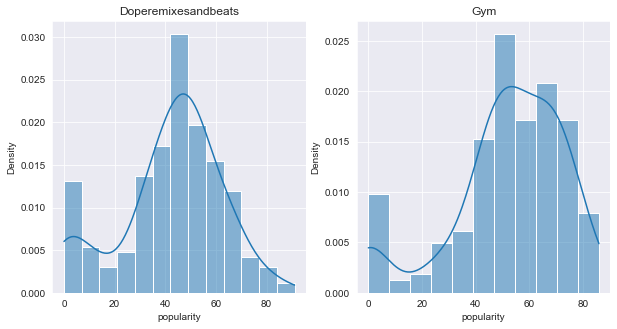

In [17]:
# Let's see if theres anything interesting happening in the popularity column across our playlist tracks

fig, axes = plt.subplots(1,2,figsize = (10,5))
sns.set_style('darkgrid')
sns.histplot(dfdope['popularity'],kde=True, ax=axes[0], stat='density')
axes[0].set_title("Doperemixesandbeats")
sns.set_style('darkgrid')
sns.histplot(dfgym['popularity'],kde=True, ax=axes[1], stat='density')
axes[1].set_title("Gym")


# We used a histogram with a KDE plot, the KDE estimates the underlying distribution of the data by
# assigning weights to data points surrounding the point and an internal bandwith parameter 
# which varies the number of data points taken into consideration in determining the probability.
# The higher the KDE, the more likely a data point would have a value close to the x-value

# I learnt about KDE here: https://mathisonian.github.io/kde/

In [21]:
display(dfdope.describe(), dfgym.describe())

,popularity
count,240.000000
mean,42.491667
std,20.079964
min,0.000000
25%,33.000000
50%,46.000000
75%,55.250000
max,91.000000


,popularity
count,209.000000
mean,52.167464
std,21.093557
min,0.000000
25%,44.000000
50%,54.000000
75%,68.000000
max,86.000000


In [22]:
'''
The popularity of tracks are quite varied but looks like it follows a normal distribution for doperemixesandbeats
aside from values at the lower end of popularity, there seems to be quite a high count of 0 values for both playlists.

The Gym playlist has a positive skew containing a higher percentage of popular songs, with the distribution
offset towards the right and the average popularity for Gym playlist being 10 higher than doperemixesandbeats

According to Spotify, the popularity of a track is determined by the number of recent plays within a timeframe. 

If popularity is likely to change, we should think about whether we want to use it as a feature in our model.
'''

print("*** Least popular tracks in each playlist *** \n")
print(dfdope[['trackName', 'popularity']][dfdope['popularity'] == 0])
print(dfgym[['trackName', 'popularity']][dfgym['popularity'] == 0])

print("\n *** Most popular tracks in each playlist *** \n")
print(dfdope[['trackName', 'popularity']][dfdope['popularity'] == dfdope['popularity'].max()])
print(dfgym[['trackName', 'popularity']][dfgym['popularity'] == dfgym['popularity'].max()])

*** Least popular tracks in each playlist *** 

                                trackName  popularity
2                         Show Me The Way           0
4                               Hot Hands           0
11                         The Roman Call           0
23         Somebody To Love - Sigma Remix           0
41                             In My Mind           0
59                    Looking For A Lover           0
83                      Never Be Like You           0
85                              Needed Me           0
95                   Places - Conro Remix           0
106                 Dream On Dutts - Edit           0
108                               Waiting           0
117                             Hyperreal           0
130     Do You Mind - Crazy Cousinz Remix           0
131  Never Be Like You - Disclosure Remix           0
163               Lights - Single Version           0
195                    What You Do - Edit           0
                 trackName  popula

[('Wilkinson', 16), ('Dimension', 14), ('Sub Focus', 7), ('SHY FX', 6), ('Hybrid Minds', 6), ('KAYTRANADA', 4), ('Gorgon City', 4), ('Flume', 4), ('ODESZA', 4), ('Disclosure', 4)]
[('Kanye West', 16), ('Headie One', 13), ('Drake', 10), ('Skepta', 10), ('J Hus', 9), ('JAY-Z', 8), ('Dave', 8), ('J. Cole', 5), ('AJ Tracey', 5), ('Chip', 5)]


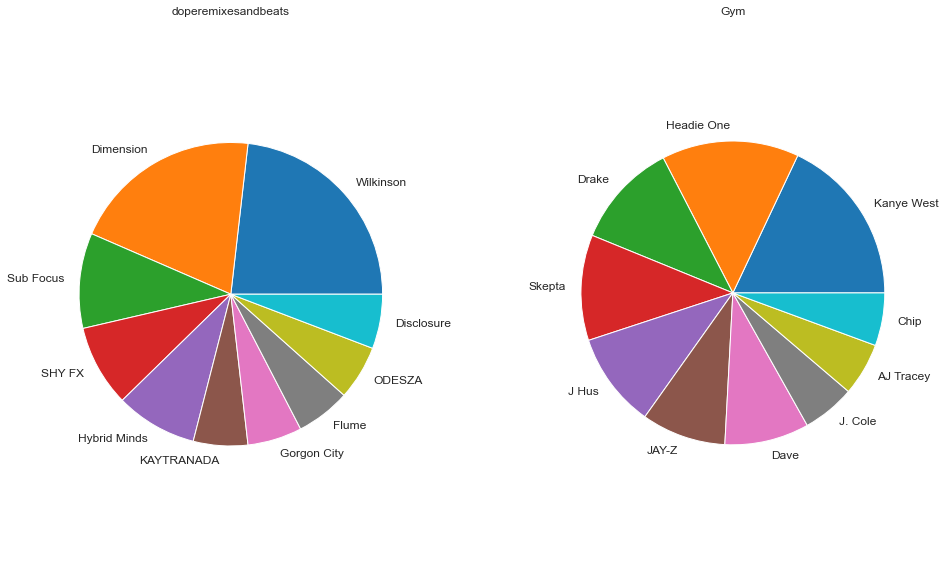

In [23]:
# Just out of curiosity, let's see if we can find the most popular artists in our playlists
dfdope['artists'].value_counts()

# Since there can be multiple artists for a song which we've split using a ; we need to find a way to separate these
# and do a count on these as separate artists

def countArtists(artistList):
    artist_count = []
    for i in range(len(artistList)):
        if ";" in artistList[i]:
            arrArtists = artistList[i].split(";")
            for j in range(len(arrArtists)):
                artist_count.append(arrArtists[j])
        else:
            artist_count.append(artistList[i])
    return artist_count

dopeartists = countArtists(dfdope['artists'])
gymartists = countArtists(dfgym['artists'])

top10_dope = Counter(dopeartists).most_common(10)
print(top10_dope)

top10_gym = Counter(gymartists).most_common(10)
print(top10_gym)

fig1, ax = plt.subplots(1,2, figsize=(15,10))
plt.subplots_adjust(wspace=0.5)
labels, sizes = zip(*top10_dope)
labels2, sizes2 = zip(*top10_gym)

ax[0].pie(sizes, labels=labels, textprops={'size': 'larger'}, colors = plt.get_cmap('tab10').colors)
ax[0].axis('equal')
ax[0].set_title("doperemixesandbeats")
ax[1].pie(sizes2, labels=labels2, textprops={'size': 'larger'}, colors=plt.get_cmap("tab10").colors)
ax[1].axis('equal')
ax[1].set_title("Gym")
plt.show()

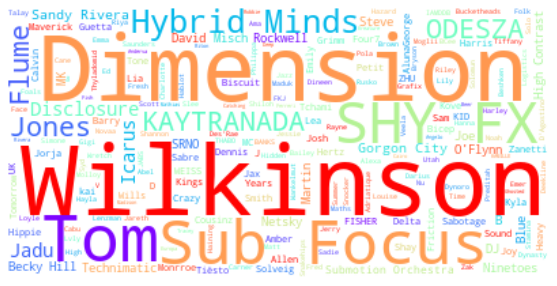

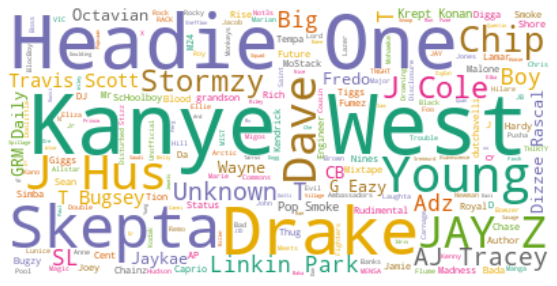

In [24]:
# We can better represent our most popular artists using a wordcloud, lets have a go

from wordcloud import WordCloud

wc = WordCloud(scale=1,colormap = 'rainbow', background_color = 'white').generate(' '.join(dopeartists))
wc2 = WordCloud(scale=1,colormap = 'Dark2', background_color = 'white').generate(' '.join(gymartists))

plt.figure(figsize=(15,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

plt.figure(figsize=(15,5))
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
'''
For each track, we can get the audio features which will give us some insight into some of the
hidden relationships between each track. 

Audio features Spotify have are:

"danceability",
"energy",
"key",
"loudness",
"mode",
"speechiness",
"acousticness",
"instrumentalness",
"liveness",
"valence",
"tempo"

Are all the tracks in this playlist high in danceability? Let's find out..

'''

# To-do this, we should utilise the ability to retrieve the features for multiple tracks rather than making
# separate requests for each. We will chunk our data into equal parts, dividing total tracks by 100 and rounding up
# to get the number of splits.

def chunks(l, n):
    """Yield n number of striped chunks from l."""
    for i in range(0, n):
        yield l[i::n]

n = math.ceil(len(lstTrackID)/100)
chunked_trackID = list(chunks(lstTrackID, n))
audio_features = []

for _ in range(n):
    audio_features+= sp.audio_features(tracks=chunked_trackID[_])

In [27]:
# Similar to before, we need to gather all our data into a dictionary so we can convert it into a dataframe object
afTrackID, afDanceability, afEnergy, afKey, afLoudness, afMode, afSpeechiness, afAcousticness, afLiveness, afValence, afTempo = ([] for i in range(11))

for i in range(len(audio_features)):
    afTrackID.append(audio_features[i]['id'])
    afDanceability.append(audio_features[i]['danceability'])
    afEnergy.append(audio_features[i]['energy'])
    afKey.append(audio_features[i]['key'])
    afLoudness.append(audio_features[i]['loudness'])
    afMode.append(audio_features[i]['mode'])
    afSpeechiness.append(audio_features[i]['speechiness'])
    afAcousticness.append(audio_features[i]['acousticness'])
    afLiveness.append(audio_features[i]['liveness'])
    afValence.append(audio_features[i]['valence'])
    afTempo.append(audio_features[i]['tempo'])
dictAF = {}
dictAF['trackID'] = afTrackID
dictAF['danceability'] = afDanceability
dictAF['energy'] = afEnergy
dictAF['key'] = afKey
dictAF['loudness'] = afLoudness
dictAF['mode'] = afMode
dictAF['speechiness'] = afSpeechiness
dictAF['acousticness'] = afAcousticness
dictAF['liveness'] = afLiveness
dictAF['valence'] = afValence
dictAF['tempo'] = afTempo
dictAF['popularity']= lstPopularity

daf = pd.DataFrame(data = dictAF)
daf.drop_duplicates(subset='trackID', inplace=True, keep=False)
daf.reset_index(drop=True, inplace=True)
daf.head()

,trackID,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,popularity
0,7zn3MMeHjee0OZAtsLMDxN,0.809,0.411,6,-9.417,0,0.0373,0.151,0.2230,0.400,127.962,54
1,4YcHuaXJb6dnGWkJzmCcwu,0.792,0.478,6,-10.626,1,0.4340,0.122,0.5190,0.134,119.979,40
2,76xNAVwiQccBXImICK5zUP,0.810,0.534,11,-5.721,0,0.0425,0.163,0.1920,0.193,106.020,0
3,4NbvIwYcwx8dNGYfUX2bKB,0.684,0.789,7,-6.889,0,0.0377,0.084,0.2170,0.411,123.989,59
4,2zeZKCbHujxCfB6e45S8fk,0.856,0.383,9,-8.725,0,0.1360,0.319,0.0978,0.525,88.014,0


In [28]:
# I want to merge the earlier dataframe which had the track details with the audio features to join the playlist name

dmerge = pd.merge(df[['trackID','playlistName']],daf, on=['trackID'])
dmerge.head()

,trackID,playlistName,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,popularity
0,7zn3MMeHjee0OZAtsLMDxN,doperemixesandbeats,0.809,0.411,6,-9.417,0,0.0373,0.1510,0.223,0.400,127.962,54
1,2ULz7EuDpQ9iifrbHLmpbx,doperemixesandbeats,0.832,0.473,11,-10.052,0,0.0452,0.0403,0.155,0.624,120.966,49
2,3gIvfz9eYPlz9DXAjpfjSq,doperemixesandbeats,0.893,0.739,9,-7.319,0,0.0807,0.0118,0.110,0.113,122.007,34
3,3xy8karhdpkltgdwj9FGbQ,doperemixesandbeats,0.572,0.498,2,-10.484,0,0.4310,0.0471,0.247,0.549,109.192,0
4,4ck1odV3DkVFENc8vEPtGf,doperemixesandbeats,0.848,0.555,10,-9.248,0,0.0437,0.0500,0.115,0.343,109.988,40


In [29]:
# Let' see if we have any null or missing values in any of our features
dmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trackID       449 non-null    object 
 1   playlistName  449 non-null    object 
 2   danceability  449 non-null    float64
 3   energy        449 non-null    float64
 4   key           449 non-null    int64  
 5   loudness      449 non-null    float64
 6   mode          449 non-null    int64  
 7   speechiness   449 non-null    float64
 8   acousticness  449 non-null    float64
 9   liveness      449 non-null    float64
 10  valence       449 non-null    float64
 11  tempo         449 non-null    float64
 12  popularity    449 non-null    int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 49.1+ KB


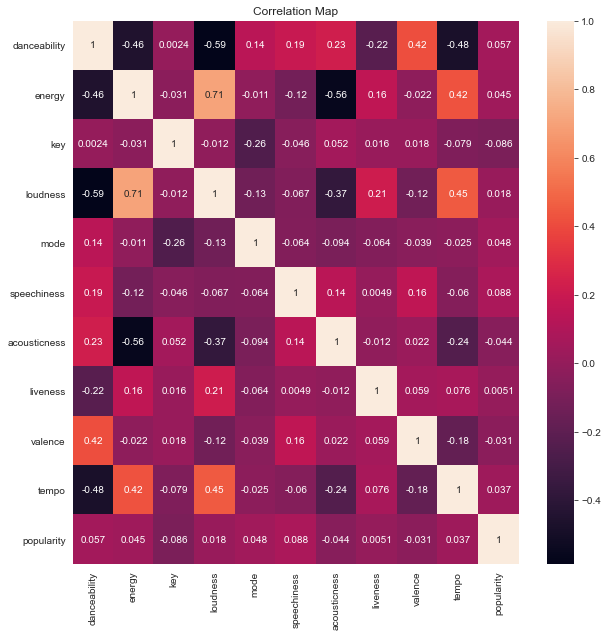

In [30]:
# Lets see what the correlations are like across the different features using a heatmap

plt.figure(figsize=(10,10))
plt.title('Correlation Map')
ax=sns.heatmap(dmerge[dmerge['playlistName'] == 'doperemixesandbeats'].drop(['trackID'], axis=1, inplace=False).corr(method='spearman'), annot=True)

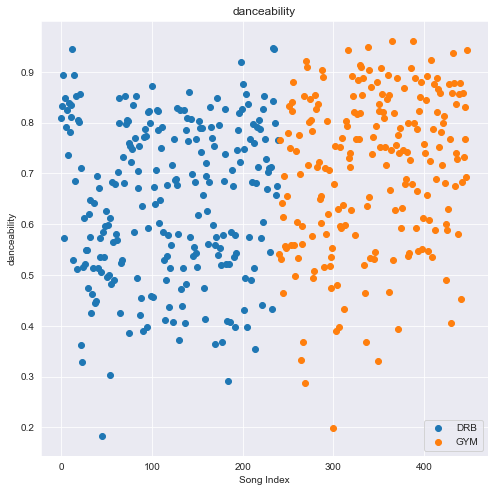

In [42]:
# Surprisingly, it doesn't seem like popularity correlates with any of the features, I would have thought
# danceability or energy would make a song more popular but doesn't seem so. Each to their own I guess!
# Let's see if there are any discernible differences in danceability between the two playlists
def comparePlaylistFeatures(feature, df):
    plt.figure(figsize=(8,8))
    plt.title(feature)
    plt.xlabel("Song Index")
    plt.ylabel(feature)
    plt.scatter(df[df['playlistName'] == 'doperemixesandbeats'].index,getattr(df[df['playlistName'] == 'doperemixesandbeats'],feature), label = "DRB")
    plt.scatter(df[df['playlistName'] == 'Gym'].index, getattr(df[df['playlistName'] == 'Gym'],feature), label = 'GYM')
    plt.legend(loc='best')
    plt.show()

comparePlaylistFeatures("danceability", dmerge)

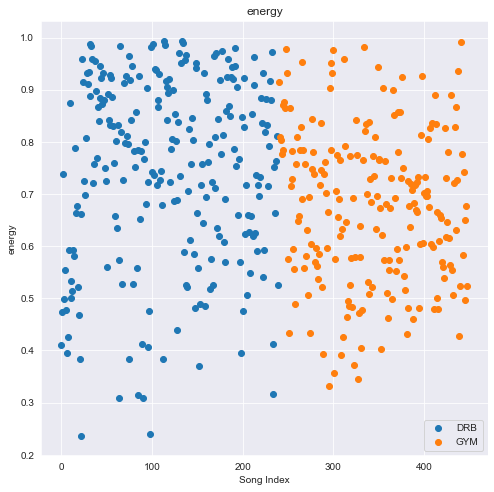

In [39]:
# Same with energy
comparePlaylistFeatures("energy", dmerge)

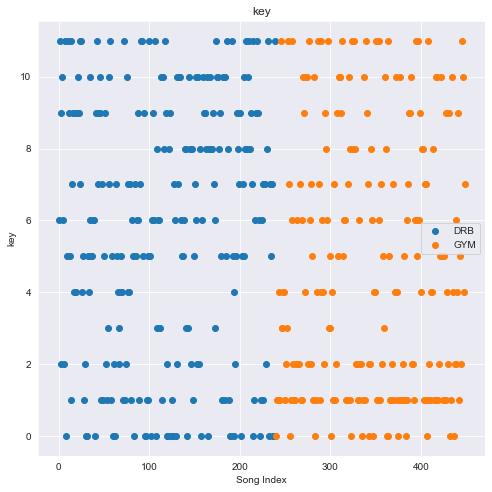

In [47]:
comparePlaylistFeatures("key", dmerge)

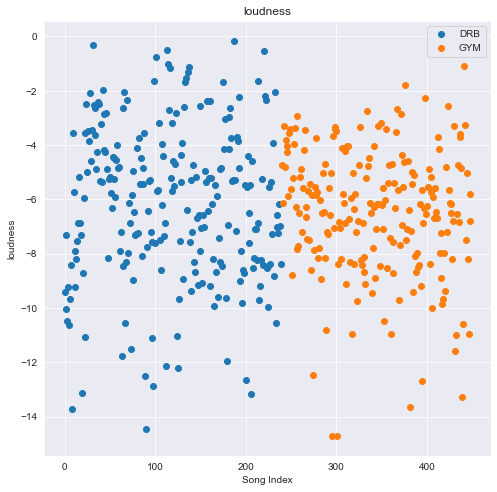

In [46]:
comparePlaylistFeatures("loudness", dmerge)

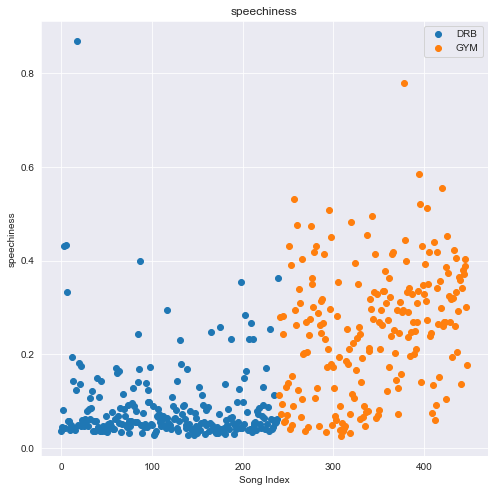

None

In [45]:
display(comparePlaylistFeatures("speechiness", dmerge))

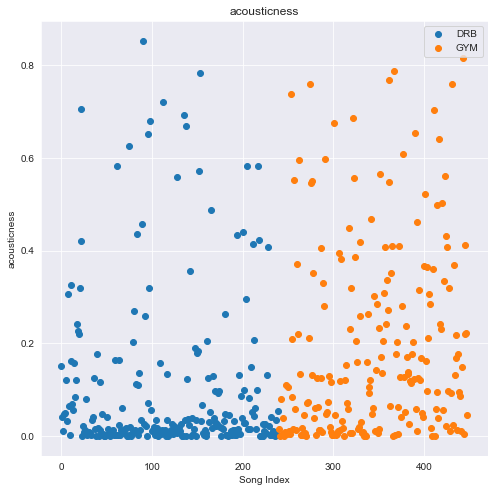

In [48]:
comparePlaylistFeatures("acousticness", dmerge)

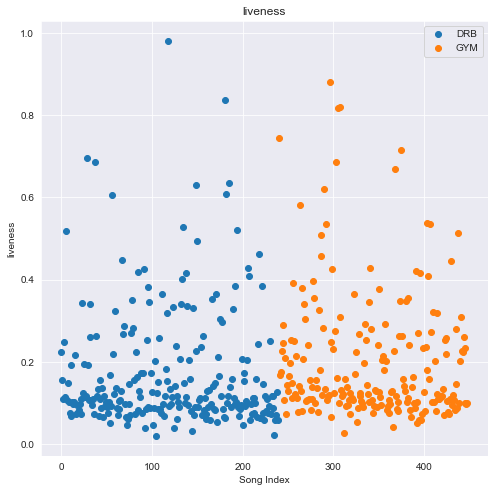

In [49]:
comparePlaylistFeatures("liveness", dmerge)

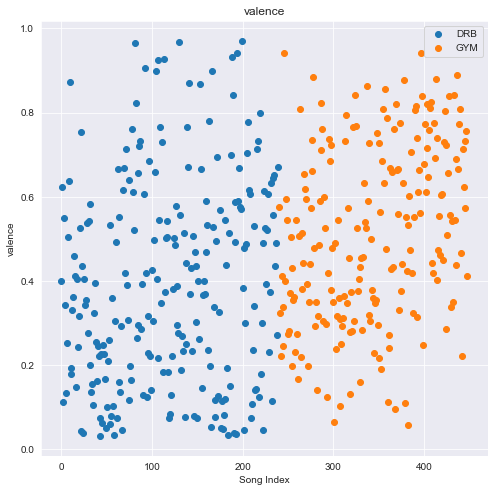

In [50]:
comparePlaylistFeatures("valence", dmerge)

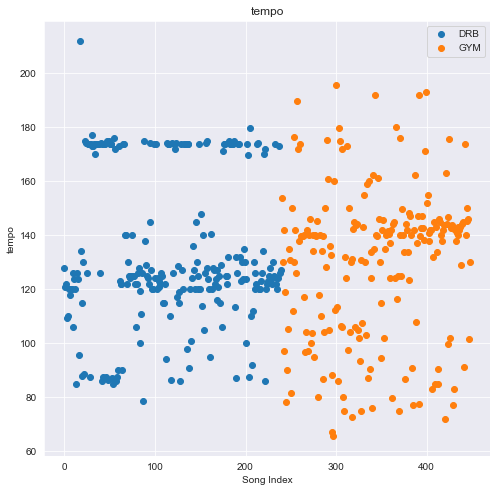

In [51]:
comparePlaylistFeatures("tempo", dmerge)

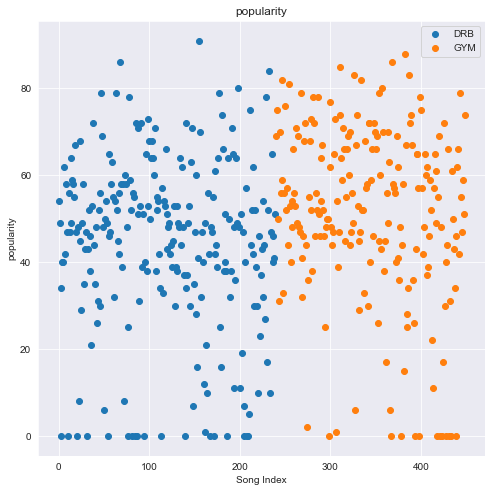

In [52]:
comparePlaylistFeatures("popularity", dmerge)

In [53]:
'''
Let's have a look at feature importance and see which features will be dominant in our classification problem,
from the analysis above, it looks like we can assume that speechiness and tempo will be the main features
diffrentating the two, but there could be more?

First we need to split our data into our training and testing set, as well as encoding the playlist field since its
the only non-numerical field. We will also need to normalise our data.

We can also utilise the labelEncoder from sklearn if we had a few more playlists
'''
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dmerge['playlistName'] = le.fit_transform(dmerge['playlistName'])
dmerge.head()

,trackID,playlistName,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,popularity
0,7zn3MMeHjee0OZAtsLMDxN,1,0.809,0.411,6,-9.417,0,0.0373,0.1510,0.223,0.400,127.962,54
1,2ULz7EuDpQ9iifrbHLmpbx,1,0.832,0.473,11,-10.052,0,0.0452,0.0403,0.155,0.624,120.966,49
2,3gIvfz9eYPlz9DXAjpfjSq,1,0.893,0.739,9,-7.319,0,0.0807,0.0118,0.110,0.113,122.007,34
3,3xy8karhdpkltgdwj9FGbQ,1,0.572,0.498,2,-10.484,0,0.4310,0.0471,0.247,0.549,109.192,0
4,4ck1odV3DkVFENc8vEPtGf,1,0.848,0.555,10,-9.248,0,0.0437,0.0500,0.115,0.343,109.988,40


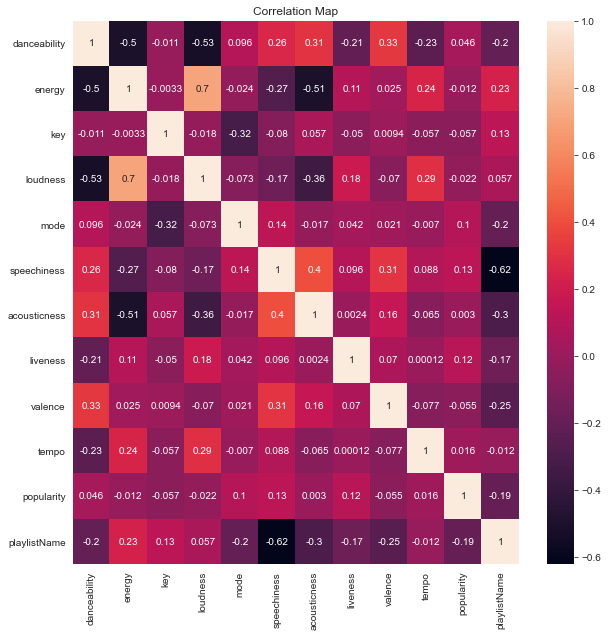

In [63]:
# Lets see what the correlations are like across the different features using a heatmap

plt.figure(figsize=(10,10))
plt.title('Correlation Map')
ax=sns.heatmap(dmerge.drop(['trackID'], axis=1, inplace=False).corr(method='spearman'), annot=True)

In [54]:
# I want to shift the playlistName column to the end, I retrieved the columns and just reordered it
dmerge = dmerge[['trackID',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'liveness',
 'valence',
 'tempo',
 'popularity','playlistName']]

In [56]:
# Now we need to split our data into train and test, we'll utilise sklearn's packages

from sklearn.model_selection import train_test_split

X = dmerge.iloc[:,1:-1]
Y = dmerge.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)
x_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,popularity
347,0.794,0.632,0,-6.163,1,0.0649,0.14200,0.1280,0.355,145.926,46
445,0.767,0.651,11,-8.194,0,0.3880,0.41200,0.2340,0.733,145.149,47
204,0.857,0.718,10,-7.611,0,0.1650,0.29600,0.1040,0.488,87.489,0
80,0.585,0.782,1,-4.101,0,0.0897,0.26900,0.1560,0.521,121.908,52
46,0.584,0.932,9,-2.831,0,0.0472,0.00408,0.0658,0.249,87.539,56


In [57]:
# And then standardise our data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [72]:
# We will start with a logistic regression model, we will use a range of iterations and pick the one with the
# highest accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_scores = {}
for _iter in range(100,1000,100):
    logmodel = LogisticRegression(max_iter = _iter, random_state = 1)
    logmodel.fit(x_train,y_train)
    logpred = logmodel.predict(x_test)
    logimportance = logmodel.coef_[0]
    log_scores[_iter] = logmodel.score(x_test,y_test)

print(log_scores)
print(classification_report(y_test,logpred))
print(confusion_matrix(y_test,logpred))
print(logmodel.score(x_test,y_test))

for i,v in enumerate(logimportance):
    print('Feature: %0d , Score: %0.2f' %(i,v))

{100: 0.7333333333333333, 200: 0.7333333333333333, 300: 0.7333333333333333, 400: 0.7333333333333333, 500: 0.7333333333333333, 600: 0.7333333333333333, 700: 0.7333333333333333, 800: 0.7333333333333333, 900: 0.7333333333333333}
              precision    recall  f1-score   support

           0       0.85      0.65      0.73        51
           1       0.65      0.85      0.73        39

    accuracy                           0.73        90
   macro avg       0.75      0.75      0.73        90
weighted avg       0.76      0.73      0.73        90

[[33 18]
 [ 6 33]]
0.7333333333333333
Feature: 0 , Score: -0.16
Feature: 1 , Score: 0.29
Feature: 2 , Score: 0.36
Feature: 3 , Score: -0.60
Feature: 4 , Score: -0.23
Feature: 5 , Score: -1.85
Feature: 6 , Score: -0.23
Feature: 7 , Score: -0.17
Feature: 8 , Score: -0.22
Feature: 9 , Score: 0.49
Feature: 10 , Score: -0.46


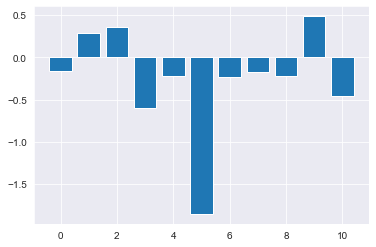

In [71]:
'''
No difference against iterations so if we choose to use logistic regression we will pick 100 iterations.
Looking at the classification report and confusion matrix, it looks like it performs better on 

Looks like feature 5, speechiness is the main feature in determining whether a song sits in which playlist, it
looks like loudness and tempo are the other features which separate the two. This isn't surprising since we did see
the most variance in speechiness from our scatter plots before.

'''

# Plot feature importance
plt.bar([x for x in range(len(logimportance))], logimportance)
plt.show()

In [85]:
# Now lets see if a Random Forest Classifier will perform better

from sklearn.ensemble import RandomForestClassifier

rf_scores = {}
for _iter in range(100,1000,100):
    rf = RandomForestClassifier(n_estimators = _iter, random_state = 1)
    rf.fit(x_train,y_train)
    rf_pred = rf.predict(x_test)
    rf_scores[_iter] = rf.score(x_test,y_test)

print(rf_scores)
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))

{100: 0.8333333333333334, 200: 0.8333333333333334, 300: 0.8444444444444444, 400: 0.8333333333333334, 500: 0.8333333333333334, 600: 0.8333333333333334, 700: 0.8444444444444444, 800: 0.8444444444444444, 900: 0.8333333333333334}
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        51
           1       0.75      0.92      0.83        39

    accuracy                           0.83        90
   macro avg       0.84      0.84      0.83        90
weighted avg       0.85      0.83      0.83        90

[[39 12]
 [ 3 36]]


In [83]:
for i,v in sorted(enumerate(rf.feature_importances_), key=lambda x:x[1], reverse=True):
    print(i,v)

5 0.3182877230504308
9 0.1750851714263096
6 0.07468795434378579
1 0.07213608818828984
0 0.06592667655720741
8 0.060961769511111916
7 0.05935119465533401
3 0.05901479762732905
10 0.058896862957514756
2 0.04294422684440703
4 0.012707534838279851


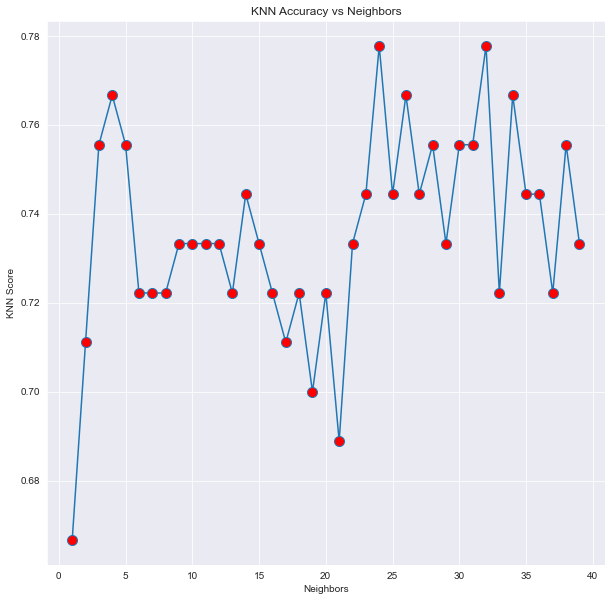

0.7777777777777778


In [86]:
# Lets see what KNN model will produce, again we'll use a range of neighbors and pick the one with the greatest 
# accuracy

from sklearn.neighbors import KNeighborsClassifier

knn_accuracy = []
for _iter in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = _iter)
    knn.fit(x_train,y_train)
    knn_pred = knn.predict(x_test)
    knn_accuracy.append(knn.score(x_test,y_test))
    
plt.figure(figsize=(10,10))
plt.plot(range(1,40),knn_accuracy, ls='solid',marker='o',markerfacecolor='red',markersize=10)
plt.title("KNN Accuracy vs Neighbors")
plt.xlabel("Neighbors")
plt.ylabel("KNN Score")
plt.show()
print(max(knn_accuracy))

In [87]:
# print classification report 
print(classification_report(y_test, knn_pred)) 
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.89      0.61      0.72        51
           1       0.64      0.90      0.74        39

    accuracy                           0.73        90
   macro avg       0.76      0.75      0.73        90
weighted avg       0.78      0.73      0.73        90

[[31 20]
 [ 4 35]]


In [88]:
# Finally, let's have a look at using a support vector machine (SVM) model and apply GridSearchCV to find the best
# hyperparameters

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.569, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.563, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.819, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.611, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.708, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.676, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.556, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.556, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.556, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.569, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


In [89]:
grid_pred = grid.predict(x_test)
print(grid.score(x_test,y_test))
  
# print classification report 
print(classification_report(y_test, grid_pred)) 
print(confusion_matrix(y_test, grid_pred))

0.7666666666666667
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        51
           1       0.68      0.87      0.76        39

    accuracy                           0.77        90
   macro avg       0.78      0.78      0.77        90
weighted avg       0.79      0.77      0.77        90

[[35 16]
 [ 5 34]]


In [90]:
'''
Overall, the summary of models performed as such:
Logistic Regression: 73.2%
Random Forest: 84.4%
KNN: 77.65% 
SVC: 76.65%

This isn't so bad considering that there are likely similarities in songs in both playlists, it might've worked
better if I had chosen a playlist with less similarities, but nevertheless the prediction is quite good and will
improve overtime as I add more songs into each playlist.

Next up will be writing the scripts to retrieve songs/audio features from a given playlist and automatically put them
into their classified playlist.

Also note that the playlists are currently active and always updating so values may change as more songs are added or
removed!

'''

"\nOverall, the summary of models performed as such:\nLogistic Regression: 75.2%\nRandom Forest: 76.4%\nKNN: 78.65% \nSVC: 78.65%\n\nThis isn't so bad considering that there are likely similarities in songs in both playlists, it might've worked\nbetter if I had chosen a playlist with less similarities, but nevertheless the prediction is quite good and will\nimprove overtime as I add more songs into each playlist.\n\nNext up will be writing the scripts to retrieve songs/audio features from a given playlist and automatically put them\ninto their classified playlist.\n\n"

In [105]:
# Overall it looks like RF gave us the best accuracy, let's see if we can adjust the features and improve on the
# result or see what happens

In [96]:
# This time round let's drop popularity
X = dmerge.iloc[:,1:-2]
Y = dmerge.iloc[:,-1]

rfx_train, rfx_test, rfy_train, rfy_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)

ss = StandardScaler()
rfx_train = ss.fit_transform(rfx_train)
rfx_test = ss.fit_transform(rfx_test)

In [97]:
# Now lets see if a Random Forest Classifier will perform better

rf_scores = {}
for _iter in range(100,1000,100):
    rf = RandomForestClassifier(n_estimators = _iter, random_state = 1)
    rf.fit(rfx_train,rfy_train)
    rfy_pred = rf.predict(rfx_test)
    rf_scores[_iter] = rf.score(rfx_test,rfy_test)

print(rf_scores)
print(classification_report(rfy_test,rfy_pred))
print(confusion_matrix(rfy_test,rfy_pred))

{100: 0.8111111111111111, 200: 0.8222222222222222, 300: 0.8111111111111111, 400: 0.8222222222222222, 500: 0.8111111111111111, 600: 0.7888888888888889, 700: 0.8111111111111111, 800: 0.7888888888888889, 900: 0.7888888888888889}
              precision    recall  f1-score   support

           0       0.90      0.71      0.79        51
           1       0.70      0.90      0.79        39

    accuracy                           0.79        90
   macro avg       0.80      0.80      0.79        90
weighted avg       0.81      0.79      0.79        90

[[36 15]
 [ 4 35]]


In [107]:
# This time round let's drop popularity
from sklearn.preprocessing import MinMaxScaler

X = dmerge.iloc[:,1:-2]
Y = dmerge.iloc[:,-1]

rfx_train, rfx_test, rfy_train, rfy_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)

mm = MinMaxScaler()
rfx_train = mm.fit_transform(rfx_train)
rfx_test = mm.fit_transform(rfx_test)

In [108]:
# Now lets see if a Random Forest Classifier will perform better

rf_scores = {}
for _iter in range(100,1000,100):
    rf = RandomForestClassifier(n_estimators = _iter, random_state = 1)
    rf.fit(rfx_train,rfy_train)
    rfy_pred = rf.predict(rfx_test)
    rf_scores[_iter] = rf.score(rfx_test,rfy_test)

print(rf_scores)
print(classification_report(rfy_test,rfy_pred))
print(confusion_matrix(rfy_test,rfy_pred))

{100: 0.7666666666666667, 200: 0.7777777777777778, 300: 0.7666666666666667, 400: 0.7555555555555555, 500: 0.7666666666666667, 600: 0.7555555555555555, 700: 0.7555555555555555, 800: 0.7555555555555555, 900: 0.7666666666666667}
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        51
           1       0.68      0.87      0.76        39

    accuracy                           0.77        90
   macro avg       0.78      0.78      0.77        90
weighted avg       0.79      0.77      0.77        90

[[35 16]
 [ 5 34]]


In [98]:
# Doesn't seem so, looks like worse performance overall but does it seem right to include popularity?
for i,v in sorted(enumerate(rf.feature_importances_), key=lambda x:x[1], reverse=True):
    print(i,v)

5 0.32953916038486236
9 0.18592728606144474
6 0.08115530482028241
1 0.07771094472049159
0 0.0695326670607268
8 0.06836819340399859
7 0.0633072241719679
3 0.06260541616980467
2 0.047654738009739656
4 0.01419906519668115


In [99]:
# Here we are retrieving the songs of our new playlist

new_playlist = "37i9dQZF1DX5WbJFtYTzv7"

new_tracks = []
offset = 0
trackCount = 1
while(offset % 100 == 0 and trackCount != 0):
    tracks = sp.playlist_items(new_playlist, offset = offset, additional_types=('track',))
    new_tracks += tracks['items']
    offset += len(tracks.get('items'))
    trackCount = len(tracks.get('items'))

In [100]:
# This time, we only need a list of the trackID's

newTrackID = []
newPopularity = []

for i in range(len(new_tracks)):
    try:
        newTrackID.append(new_tracks[i].get('track').get('id'))
        newPopularity.append(new_tracks[i].get('track').get('popularity'))
    except:
        pass

In [101]:
# Again, we chunk the list into equal pieces for our audio feature retrieval

n = math.ceil(len(lstTrackID)/100)
chunked_newtrackID = list(chunks(newTrackID, n))
new_audio_features = []

for _ in range(n):
    new_audio_features+= sp.audio_features(tracks=chunked_newtrackID[_])

In [102]:
newTrackID, newDanceability, newEnergy, newKey, newLoudness, newMode, newSpeechiness, newAcousticness, newLiveness, newValence, newTempo = ([] for i in range(11))

for i in range(len(new_audio_features)):
    newTrackID.append(new_audio_features[i]['id'])
    newDanceability.append(new_audio_features[i]['danceability'])
    newEnergy.append(new_audio_features[i]['energy'])
    newKey.append(new_audio_features[i]['key'])
    newLoudness.append(new_audio_features[i]['loudness'])
    newMode.append(new_audio_features[i]['mode'])
    newSpeechiness.append(new_audio_features[i]['speechiness'])
    newAcousticness.append(new_audio_features[i]['acousticness'])
    newLiveness.append(new_audio_features[i]['liveness'])
    newValence.append(new_audio_features[i]['valence'])
    newTempo.append(new_audio_features[i]['tempo'])
    
dictNew = {}
dictNew['trackID'] = newTrackID
dictNew['danceability'] = newDanceability
dictNew['energy'] = newEnergy
dictNew['key'] = newKey
dictNew['loudness'] = newLoudness
dictNew['mode'] = newMode
dictNew['speechiness'] = newSpeechiness
dictNew['acousticness'] = newAcousticness
dictNew['liveness'] = newLiveness
dictNew['valence'] = newValence
dictNew['tempo'] = newTempo
dictNew['popularity']= newPopularity

d_new = pd.DataFrame(data = dictNew)
d_new.drop_duplicates(subset='trackID', inplace=True, keep=False)
d_new.reset_index(drop=True, inplace=True)
d_new.head()

,trackID,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,popularity
0,6gRbkI6s0M7zTE9uhRZUjV,0.781,0.720,6,-8.347,0,0.1650,0.11200,0.153,0.403,150.074,52
1,2pty3r2awm2Ir904mq5Fxw,0.799,0.807,11,-7.051,0,0.2690,0.28500,0.415,0.602,157.030,49
2,7HA3jgB7g6uR800FJZ2E7j,0.817,0.685,4,-8.100,0,0.2700,0.12700,0.117,0.472,140.054,50
3,5y2K7jr9M8t1HRAu9jzssT,0.859,0.624,1,-5.437,1,0.0915,0.00531,0.184,0.635,149.948,51
4,2dfqS3MRtbLZSZA1IL8xY5,0.745,0.822,7,-6.354,1,0.2520,0.01030,0.155,0.415,86.733,58


In [103]:
# Now we standardise our data again and using the KNN with our highest accuracy neighbors of 8 to predict where 
# each of the songs fall, remember 1 is doperemixesandbeats and 0 is Gym playlist

ss = StandardScaler()
x_new = ss.fit_transform(d_new.iloc[:,1:-1])

rf_final = RandomForestClassifier(n_estimators = 200, random_state = 1)
rf_final.fit(rfx_train,rfy_train)
rf_pred = rf_final.predict(x_new)

rf_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [104]:
unique, counts = np.unique(rf_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 38]
 [ 1 24]]


In [ ]:
# Adding model predictions to new playlist DF
d_new['playlist'] = rf_pred

In [ ]:
# Separating the track ID's into their respective playlists predicted by the model
new_dope_tracks = list(d_new['trackID'][d_new['playlist'] == 1])
new_gym_tracks = list(d_new['trackID'][d_new['playlist'] == 0])

In [ ]:
# Here we add the songs which were classified by the model to their respective playlists

sp.playlist_add_items('5jBarqT34NO0sJTDRXFA64', new_dope_tracks)
sp.playlist_add_items('4u2ZnEsDXrIZJ7vxggzPoR', new_gym_tracks)